In [1]:
import numpy as np

import tensorflow_datasets as tfds
import tensorflow as tf

tfds.disable_progress_bar()

2022-04-30 16:09:26.334828: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-30 16:09:26.334851: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/home/avnish/iNeuron_Private_Intelligence_Limited/AIOPS/digital_ocean_flask/venv/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt


def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [3]:
dataset, info = tfds.load('imdb_reviews', with_info=True,
                          as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

train_dataset.element_spec

2022-04-30 16:09:28.397695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-30 16:09:28.398288: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-04-30 16:09:28.398366: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-04-30 16:09:28.398416: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-04-30 16:09:28.398492: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Co

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [38]:
dataset['train'].take(1)

<TakeDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [55]:
dataset['train']

<PrefetchDataset shapes: ((), ()), types: (tf.string, tf.int64)>

In [ ]:
import tensorflow as tf

x = tf.constant([[2.0, 3.0, 3.0],
                 [1.0, 5.0, 9.0]], dtype='float32')
# Write to file
ds = (tf.data.Dataset.from_tensors(x)
      .map(tf.io.serialize_tensor))
writer = tf.data.experimental.TFRecordWriter('temp.tfrecord')
writer.write(ds)
# Read from file
parse_tensor_f32 = lambda x: tf.io.parse_tensor(x, tf.float32)
ds2 = (tf.data.TFRecordDataset('temp.tfrecord')
       .map(parse_tensor_f32))
for x2 in ds2:
    tf.print(x2)
# [[2 3 3]
#  [1 5 9]]

In [34]:
for x,y in dataset['train'].take(1):
    print(x,y)

tf.Tensor(b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it.", shape=(), dtype=string) tf.Tensor(0, shape=(), dtype=int64)


In [20]:
for i, _ in enumerate(dataset['train'].element_spec):
    print(i,_)
    ds_i = dataset['train'].map(lambda *args: args[i]).map(tf.io.serialize_tensor)
    writer = tf.data.experimental.TFRecordWriter(f'mydata.{i}.tfrecord')
    writer.write(ds_i)

0 TensorSpec(shape=(), dtype=tf.string, name=None)
1 TensorSpec(shape=(), dtype=tf.int64, name=None)


In [27]:
raw_dataset=tf.data.TFRecordDataset("mydata.1.tfrecord")
for raw_record in raw_dataset.take(1):
    example = tf.train.Example()
    example.ParseFromString(raw_record.numpy())
    print(example)

In [29]:
tf.constant([[0,0],[1,2]])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[0, 0],
       [1, 2]], dtype=int32)>

In [ ]:
tf.data.

In [ ]:
schema = {
    
    
}

In [ ]:
# Write the records to a file.
... with tf.io.TFRecordWriter(example_path) as file_writer:
...   for _ in range(4):
...     x, y = np.random.random(), np.random.random()
...
...     record_bytes = tf.train.Example(features=tf.train.Features(feature={
...         "x": tf.train.Feature(float_list=tf.train.FloatList(value=[x])),
...         "y": tf.train.Feature(float_list=tf.train.FloatList(value=[y])),
...     })).SerializeToString()
...     file_writer.write(record_bytes)

>>> # Read the data back out.
>>> def decode_fn(record_bytes):
...   return tf.io.parse_single_example(
...       # Data
...       record_bytes,
...
...       # Schema
...       {"x": tf.io.FixedLenFeature([], dtype=tf.float32),
...        "y": tf.io.FixedLenFeature([], dtype=tf.float32)}
...   )

>>> for batch in tf.data.TFRecordDataset([example_path]).map(decode_fn):
...   print("x = {x:.4f},  y = {y:.4f}".format(**batch))
x = 0.5488,  y = 0.7152
x = 0.6028,  y = 0.5449
x = 0.4237,  y = 0.6459
x = 0.4376,  y = 0.8918

In [4]:
for example, label in train_dataset.take(1):
  print('text: ', example.numpy())
  print('label: ', label.numpy())

text:  b"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."
label:  0


2022-04-30 14:27:53.228231: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [5]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

In [6]:
train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [7]:
for example, label in train_dataset.take(1):
  print('texts: ', example.numpy()[:3])
  print()
  print('labels: ', label.numpy()[:3])

texts:  [b'I have never seen such terrible performances in all my life.<br /><br />Everyone in the entire film was absolute rubbish.<br /><br />Not one decent actor/actress in the whole film, it was a joke.<br /><br />Reminded me of drama at school...'
 b'Even 15 years after the end of the Vietnam war "Jacknife" came not too late or was even superfluous. It\'s one of the few that try to deal with the second sad side of the war: The time after. Different from movies like "Taxi driver" or "Rambo" which use to present their main characters as broken heroes in a bad after war environment this movie allows the audience to face a different view on the Vietnam vets. Their development is shown very precisely before and especially after the war. The problems are obvious but in all this tragic there is always the feeling of some hope on the basis of love and friendship. "Jacknife" might be the quietest Vietnam movie ever but after almost 15 years this is really plausible and therefor justified. 

2022-04-30 14:28:18.736569: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [8]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

In [9]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'the', 'and', 'a', 'of', 'to', 'is', 'in', 'it', 'i',
       'this', 'that', 'br', 'was', 'as', 'for', 'with', 'movie', 'but'],
      dtype='<U14')

In [10]:
encoded_example = encoder(example)[:3].numpy()
encoded_example

array([[ 10,  26, 110, ...,   0,   0,   0],
       [ 54,   1, 148, ...,   0,   0,   0],
       [  1,   1,   1, ...,  70, 142,   1]])

In [11]:
for n in range(3):
  print("Original: ", example[n].numpy())
  print("Round-trip: ", " ".join(vocab[encoded_example[n]]))
  print()

Original:  b'I have never seen such terrible performances in all my life.<br /><br />Everyone in the entire film was absolute rubbish.<br /><br />Not one decent actor/actress in the whole film, it was a joke.<br /><br />Reminded me of drama at school...'
Round-trip:  i have never seen such terrible performances in all my [UNK] br everyone in the entire film was [UNK] [UNK] br not one decent [UNK] in the whole film it was a [UNK] br [UNK] me of drama at school                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

<img src="https://www.tensorflow.org/text/tutorials/images/bidirectional.png">

In [14]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=64,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, None)             0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, None, 64)          64000     
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 138,369
Trainable params: 138,369
Non-trai

In [16]:
# predict on a sample text without padding.

sample_text = ('The movie was cool. The animation and the graphics '
               'were out of this world. I would recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions[0])

[-0.00089124]


In [17]:
# predict on a sample text with padding

padding = "the " * 2000
predictions = model.predict(np.array([sample_text, padding]))
print(predictions[0])

[-0.00089124]


In [18]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [19]:
history = model.fit(train_dataset, epochs=10,
                    validation_data=test_dataset,
                    validation_steps=30)

Epoch 1/10
391/391 [==============================] - 212s 529ms/step - loss: 0.6492 - accuracy: 0.5569 - val_loss: 0.5164 - val_accuracy: 0.7406


2022-04-30 14:39:20.724375: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 2/10
391/391 [==============================] - 197s 504ms/step - loss: 0.4176 - accuracy: 0.8044 - val_loss: 0.3691 - val_accuracy: 0.8422


2022-04-30 14:42:37.657509: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 3/10
391/391 [==============================] - 240s 614ms/step - loss: 0.3457 - accuracy: 0.8483 - val_loss: 0.3418 - val_accuracy: 0.8516


2022-04-30 14:46:37.868725: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 4/10
391/391 [==============================] - 226s 578ms/step - loss: 0.3233 - accuracy: 0.8603 - val_loss: 0.3387 - val_accuracy: 0.8599


2022-04-30 14:50:23.939258: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 5/10
391/391 [==============================] - 224s 573ms/step - loss: 0.3138 - accuracy: 0.8656 - val_loss: 0.3269 - val_accuracy: 0.8552


2022-04-30 14:54:08.387265: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 6/10
391/391 [==============================] - 221s 564ms/step - loss: 0.3085 - accuracy: 0.8677 - val_loss: 0.3255 - val_accuracy: 0.8521


2022-04-30 14:57:49.026440: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 7/10
391/391 [==============================] - 211s 540ms/step - loss: 0.3033 - accuracy: 0.8705 - val_loss: 0.3288 - val_accuracy: 0.8453


2022-04-30 15:02:01.777849: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 8/10
391/391 [==============================] - 232s 594ms/step - loss: 0.3007 - accuracy: 0.8705 - val_loss: 0.3214 - val_accuracy: 0.8589


2022-04-30 15:05:54.057132: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 9/10
391/391 [==============================] - 189s 483ms/step - loss: 0.3014 - accuracy: 0.8720 - val_loss: 0.3298 - val_accuracy: 0.8604


2022-04-30 15:09:03.357248: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


Epoch 10/10
391/391 [==============================] - 181s 462ms/step - loss: 0.2975 - accuracy: 0.8722 - val_loss: 0.3202 - val_accuracy: 0.8578


2022-04-30 15:12:04.021377: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


In [20]:
test_loss, test_acc = model.evaluate(test_dataset)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

391/391 [==============================] - 57s 145ms/step - loss: 0.3162 - accuracy: 0.8553
Test Loss: 0.3162294030189514
Test Accuracy: 0.8553199768066406


In [21]:
# predict on a sample text without padding.

sample_text = ('The movie was not good. The animation and the graphics '
               'were terrible. I would not recommend this movie.')
predictions = model.predict(np.array([sample_text]))
print(predictions)

[[-1.4745029]]


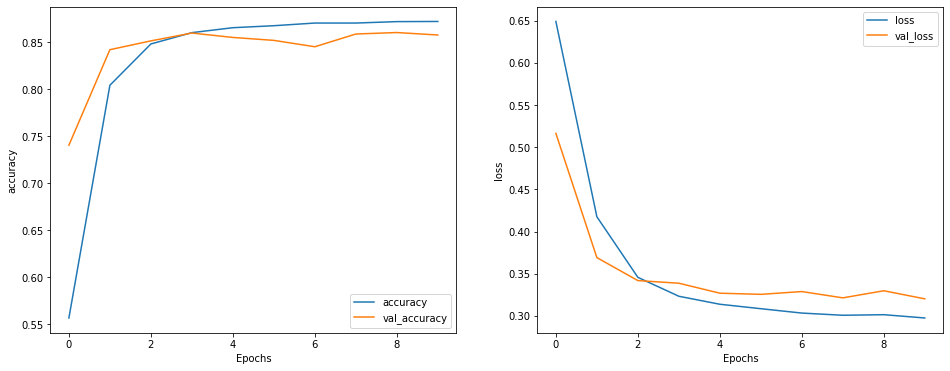

In [22]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')

In [23]:
train_dataset

<PrefetchDataset shapes: ((None,), (None,)), types: (tf.string, tf.int64)>

In [24]:
import os

In [25]:
os.makedirs("models", exist_ok=True)

In [26]:
model.save("models/")

2022-04-30 15:45:08.929843: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: models/assets


INFO:tensorflow:Assets written to: models/assets
